# EDA on football stats

Playing around for a bit first.

Data downloaded from http://nflsavant.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
full_df = pd.read_csv('data/pbp-2018.csv')

In [4]:
full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False])

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
1841,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,NaN,1,NaN,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN ...,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0
1842,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,NaN,0,NaN,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0
1843,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,NaN,1,NaN,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0
25574,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,NaN,0,NaN,0,(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 2...,0,NaN,NaN,2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0
25575,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,NaN,0,NaN,0,(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SH...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10
25576,2018090902,2018-09-09,1,13,18,IND,CIN,2,14,86,NaN,0,NaN,0,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT IN...,0,NaN,NaN,2018,2,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,14,OPP,0,NaN,0,NaN,0
1844,2018090902,2018-09-09,1,13,10,CIN,IND,1,10,7,NaN,0,NaN,0,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4...,0,NaN,NaN,2018,4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT GUARD,7,OWN,0,NaN,0,NaN,0
1845,2018090902,2018-09-09,1,12,32,CIN,IND,2,6,11,NaN,1,NaN,0,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.E...,0,NaN,NaN,2018,29,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,11,OWN,0,NaN,0,NaN,0
1846,2018090902,2018-09-09,1,11,55,CIN,IND,1,10,40,NaN,0,NaN,0,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YA...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,40,OWN,0,NaN,0,NaN,0
1847,2018090902,2018-09-09,1,11,17,CIN,IND,2,3,47,NaN,1,NaN,0,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,21,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,47,OWN,0,NaN,0,NaN,0


Note for the
  * end of quarter/half/game
  * timeout
  * two-minute warning

the OffenseTeam is NaN.

In [5]:
full_df[(full_df.Minute==0) & (full_df.Second==0)].OffenseTeam[1]

nan

In [6]:
full_df[full_df.OffenseTeam.isna()]

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
1,2018090600,2018-09-06,2,0,0,NaN,ATL,0,0,0,NaN,1,NaN,0,END QUARTER 2,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2,2018090600,2018-09-06,3,0,0,NaN,ATL,0,0,0,NaN,1,NaN,0,END QUARTER 3,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
3,2018090600,2018-09-06,4,2,19,NaN,ATL,0,0,0,NaN,1,NaN,0,TIMEOUT #2 BY PHI AT 02:19.,0,NaN,NaN,2018,0,UNDER CENTER,TIMEOUT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4,2018090600,2018-09-06,4,1,18,NaN,ATL,0,0,0,NaN,1,NaN,0,TIMEOUT #2 BY ATL AT 01:18.,0,NaN,NaN,2018,0,UNDER CENTER,TIMEOUT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
5,2018090901,2018-09-09,1,0,0,NaN,PIT,0,0,0,NaN,1,NaN,0,END QUARTER 1,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
6,2018090901,2018-09-09,2,1,58,NaN,PIT,0,0,0,NaN,1,NaN,0,TWO-MINUTE WARNING,0,NaN,NaN,2018,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
7,2018090902,2018-09-09,1,1,27,NaN,CIN,0,0,0,NaN,1,NaN,0,TIMEOUT #1 BY CIN AT 01:27.,0,NaN,NaN,2018,0,UNDER CENTER,TIMEOUT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
8,2018090902,2018-09-09,1,0,0,NaN,CIN,0,0,0,NaN,1,NaN,0,END QUARTER 1,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
10,2018090902,2018-09-09,3,0,0,NaN,CIN,0,0,0,NaN,1,NaN,0,END QUARTER 3,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
11,2018090903,2018-09-09,1,0,0,NaN,TEN,0,0,0,NaN,1,NaN,0,END QUARTER 1,0,NaN,NaN,2018,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0


Let's start graphing!

In [7]:
#df = full_df[full_df.GameId==2018090900].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)
df = full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)

In [8]:
def add_time_column(df):
    df['Time'] = (df.Quarter-1)*60*15 + (15-df.Minute)*60 - df.Second

def add_yards_column(df):
    """Add column Fixed Yards, but with directions reversed for quarters 2 and 4
    (so they teams go in the same direction)"""
    df['Position'] = df.YardLine - 50
    #df.Position *= (df.Quarter.isin([1,3]))*2 - 1
    df.Position += 50

In [9]:
add_time_column(df)
add_yards_column(df)

In [10]:
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Time,Position
0,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,NaN,1,NaN,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN ...,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0,0,35
1,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,NaN,0,NaN,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0,7,30
2,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,NaN,1,NaN,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0,49,37
3,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,NaN,0,NaN,0,(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 2...,0,NaN,NaN,2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0,59,93
4,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,NaN,0,NaN,0,(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SH...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10,97,96


(0, 3600)

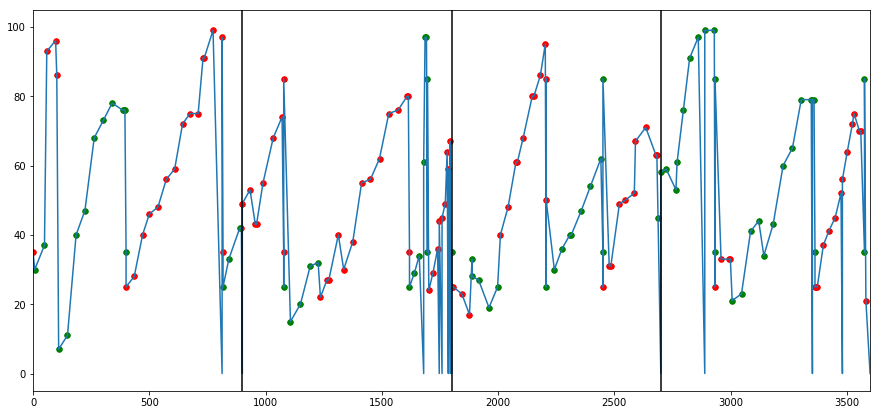

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.Time, df.Position)
first_down = df[df.Down == 1]


for team, color in zip(['IND', 'CIN'], ['r', 'g']):
    sub_df = df[df.OffenseTeam==team]
    ax.scatter(sub_df.Time, sub_df.Position, s=30, color=color)
    ax.scatter(sub_df.Time, sub_df.Position, s=20, color=color)

ax.axvline(15*60, color='k')
ax.axvline(2*15*60, color='k')
ax.axvline(3*15*60, color='k')
ax.set_xlim(0, 60*15*4)

In [13]:
df

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Time,Position
0,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,NaN,1,NaN,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN ...,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0,0,35
1,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,NaN,0,NaN,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0,7,30
2,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,NaN,1,NaN,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0,49,37
3,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,NaN,0,NaN,0,(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 2...,0,NaN,NaN,2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0,59,93
4,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,NaN,0,NaN,0,(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SH...,0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10,97,96
5,2018090902,2018-09-09,1,13,18,IND,CIN,2,14,86,NaN,0,NaN,0,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT IN...,0,NaN,NaN,2018,2,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,14,OPP,0,NaN,0,NaN,0,102,86
6,2018090902,2018-09-09,1,13,10,CIN,IND,1,10,7,NaN,0,NaN,0,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4...,0,NaN,NaN,2018,4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT GUARD,7,OWN,0,NaN,0,NaN,0,110,7
7,2018090902,2018-09-09,1,12,32,CIN,IND,2,6,11,NaN,1,NaN,0,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.E...,0,NaN,NaN,2018,29,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,11,OWN,0,NaN,0,NaN,0,148,11
8,2018090902,2018-09-09,1,11,55,CIN,IND,1,10,40,NaN,0,NaN,0,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YA...,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,40,OWN,0,NaN,0,NaN,0,185,40
9,2018090902,2018-09-09,1,11,17,CIN,IND,2,3,47,NaN,1,NaN,0,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT ...,0,NaN,NaN,2018,21,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,47,OWN,0,NaN,0,NaN,0,223,47


In [64]:
def plot_game(ax, df):
    for i, row in df.iterrows():
        # to do: add Color to df
        color = 'r' if row.OffenseTeam == 'IND' else 'b'
        if row.PlayType == 'KICK OFF':
            ax.scatter([row.Time], [row.Position], marker="*", color=color)
        else:
            ax.scatter([row.Time], [row.Position], marker=".", color=color)
            
    ax.axvline(15*60, color='k')
    ax.axvline(2*15*60, color='k')
    ax.axvline(3*15*60, color='k')
    for line in range(10, 100, 10):
        ax.axhline(line, color='k', lw=0.3)
    ax.set_xticks(np.arange(0, 60*61, 60*5))
    ax.set_xticklabels(np.arange(0, 61, 5))
    ax.set_xlim(0, 60*15*4)
    ax.set_ylim(0, 100)

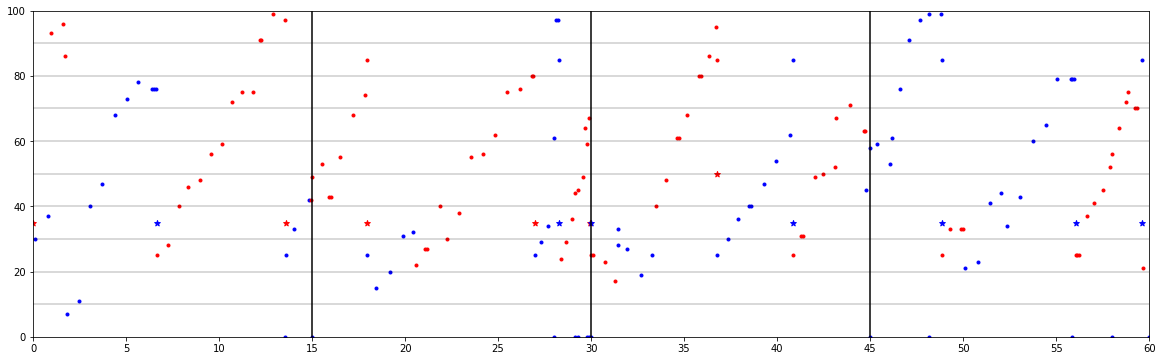

In [65]:
fig, ax = plt.subplots(figsize=(20,6))
plot_game(ax, df)

AttributeError: 'DataFrame' object has no attribute 'row'